In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')                                                   # mounting google drive to the file to access the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
import nltk
from nltk import punkt
import nltk.downloader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopWords = set(stopwords.words('english'))

In [ ]:
print(len(stopWords))

179


In [ ]:
root_dir = 'drive/My Drive'                                                     # root directory of the dataset
local_path = '/ISOT/'                                                           # folder of the stored ISOT dataset
data_dir = root_dir + local_path


data_path_real = data_dir + 'True.csv'                                          # defined path to the training data for real news
data_path_fake = data_dir + 'Fake.csv'                                          # defined path to the training data for fake news

In [ ]:
train_set_real= pd.read_csv(data_path_real)                                     # reading the csv file for real news content
train_set_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
train_set_real = train_set_real.assign(label='1')                               # adding label 1 for all news thats real
train_set_real.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [ ]:
train_set_real.isnull().sum()  

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_real.duplicated().sum() 

206

In [ ]:
train_set_real.drop_duplicates()                                                # dropping duplicates in all columns of real news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
train_set_fake= pd.read_csv(data_path_fake)                                     # reading the csv file for fake news content
train_set_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
train_set_fake = train_set_fake.assign(label='0')                               # adding label 0 for all news thats fake
train_set_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
train_set_fake.isnull().sum()                                                   # checking for null values in all columns of fake news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_fake.duplicated().sum()  

3

In [ ]:
train_set_fake.drop_duplicates()                                                # dropping duplicates in all columns of fake news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

In [ ]:
import re

def lower_case (text):
    return text.lower()                                                         # converting text to lower case


def remove_number (text):                                                       # removing numbers from the text corpus
    text_new=""
    for num in text:
        if num.isdigit()==False:
            text_new=text_new+num
    return text_new


def remove_punctutaion(text):                                                   # removing punctuation 
    text_new=''
    for punc in text:
        if punc not in string.punctuation:
            text_new=text_new+punc
    return text_new


def remove_special_characters(text):                                            # Removing special characters
    text_new=''
    for char in text:
        if (char.isalnum()==True) or (char==' '):
            text_new=text_new+char
    return(text_new)


def remove_stopwords(text):                                                     # Removing english stopwords
    text_new=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            text_new.append(word)
    return " ".join(text_new)


def stemming(text):                                                             # Stemming words to root words
    wordlist = word_tokenize(text)
    post_stem = [ps.stem(word) for word in wordlist]
    return ' '.join(post_stem)

 
def remove_whitespace(text):                                                    # Removing extra whitespaces
    return(wst.tokenize(text))


def remove_news_name(x):
    new=[]
    for a in x.split():
        if a not in ('video'):
            new.append(a)

    return " ".join(new)

def compose(f, g):
    return lambda x: f(g(x))

In [ ]:
final=compose(compose(compose(compose(compose(compose(compose(remove_whitespace,stemming),remove_news_name),remove_stopwords),remove_special_characters),remove_punctutaion),remove_number),lower_case)

In [ ]:
real = train_set_real.loc[train_set_real['label'] == '1'].sample(n=7500)        # taking 35% data as sample data from the real news dataset

In [ ]:
real.shape

(7500, 5)

In [ ]:
real.head(3)

,title,text,subject,date,label
885,Trump forces high-wire act for Republican in V...,"FRONT ROYAL, Va. (Reuters) - Ralph and Mike Wa...",politicsNews,"November 2, 2017",1
6964,"Obama, trying to protect legacy, unlikely to a...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"December 1, 2016",1
14739,Russian long-range bombers strike Islamic Stat...,MOSCOW (Reuters) - Six Russian long-range bomb...,worldnews,"November 15, 2017",1


In [ ]:
fake = train_set_fake.loc[train_set_fake['label'] == '0'].sample(n=7500)        # taking 32% data as sample data from the fake news dataset

In [ ]:
fake.shape

(7500, 5)

In [ ]:
fake.head(3)

,title,text,subject,date,label
19765,COULD YOUR Mail Carrier Be Throwing Your Vote ...,,left-news,"Oct 21, 2016",0
19610,BUH-BYE! GLENN BECK Places Final Nail In His C...,"Glenn Beck has just proven once again, (to any...",left-news,"Nov 15, 2016",0
3901,WATCH: Trump Adviser Stammers While Being Gri...,"With less than 24 hours before Election Day, t...",News,"November 7, 2016",0


In [ ]:
concat_set=pd.concat([real, fake],axis=0)                                       # concatenating both the datasets to make one whole dataset of fake and real news

In [ ]:
concat_set.shape

(15000, 5)

In [ ]:
concat_set.head(5)

,title,text,subject,date,label
885,Trump forces high-wire act for Republican in V...,"FRONT ROYAL, Va. (Reuters) - Ralph and Mike Wa...",politicsNews,"November 2, 2017",1
6964,"Obama, trying to protect legacy, unlikely to a...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"December 1, 2016",1
14739,Russian long-range bombers strike Islamic Stat...,MOSCOW (Reuters) - Six Russian long-range bomb...,worldnews,"November 15, 2017",1
19979,Russia says North Korea's latest missile launc...,MOSCOW (Reuters) - The Russian Foreign Ministr...,worldnews,"September 15, 2017",1
13418,Italy's Berlusconi sent to trial accused of br...,"SIENA, Italy (Reuters) - Former Italian prime ...",worldnews,"November 30, 2017",1


In [ ]:
X=concat_set['text']                                                            # selecting feature for detection
Y=concat_set['label']

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, stratify=Y, test_size=0.3,random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(10500,) (10500,) (4500,) (4500,)


In [ ]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
le = preprocessing.LabelEncoder()                                               # transforms non numeric labels to numeric labels

In [ ]:
x_train

17471    CNN host Don Lemon continues to show his extre...
4556     You ve got to love Robert Reich. The former Se...
14888    When did white students become throw away citi...
9717     WASHINGTON (Reuters) - Front-runner Donald Tru...
10145    THE MUSLIM ACTIVIST GROUP CAIR is REALLY stepp...
                               ...                        
21028    SANTIAGO (Reuters) - Taxi drivers protesting t...
15725    NEW YORK (Reuters) - A wealthy Turkish gold tr...
20151    TUNIS (Reuters) - Tunisia s parliament on Wedn...
10432    HAVANA (Reuters) - Cuba said it would welcome ...
8188     WASHINGTON (Reuters) - Democrat Hillary Clinto...
Name: text, Length: 7350, dtype: object

In [ ]:
x_train_set = le.fit_transform(x_train)                                         # converts training text to numeric one dimensional array

In [ ]:
x_train_set

array([1603, 7065, 6851, ..., 4837, 2382, 5672])

In [ ]:
y_train

17471    0
4556     0
14888    0
9717     1
10145    0
        ..
21028    1
15725    1
20151    1
10432    1
8188     1
Name: label, Length: 7350, dtype: object

In [ ]:
y_train_set = le.fit_transform(y_train)                                         # converts testing text to numeric one dimensional array

In [ ]:
y_train_set

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
x_train_re = x_train_set.reshape(-1,1)

In [ ]:
x_train_re

array([[1603],
       [7065],
       [6851],
       ...,
       [4837],
       [2382],
       [5672]])

In [ ]:
y_train_re = y_train_set.reshape(-1,1)

In [ ]:
y_train_re

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
coun_vectorizer = CountVectorizer(max_features=5, analyzer=final)
count_matrix = coun_vectorizer.fit_transform(x_train)
count_array = count_matrix.toarray()
top_features = pd.DataFrame(data=count_array,columns = coun_vectorizer.get_feature_names())
print(top_features)

      presid  said  state  trump  us
0          1     0      0     11   0
1          0     3      3      0   3
2          1     0      0      9   0
3          0    10      3      0   0
4          0     0      0      0   0
...      ...   ...    ...    ...  ..
7345       1     0      2      0   0
7346       6    10      3     15  13
7347       5     1      2      6  20
7348       1     4      0      7   0
7349       0     3      0      0   0

[7350 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5, analyzer=final)
tfidf_matrix = tfidf_vectorizer.fit_transform(x_train)
tfidf_array = tfidf_matrix.toarray()
top_features = pd.DataFrame(data=tfidf_array,columns = tfidf_vectorizer.get_feature_names())
print(top_features)

        presid      said     state     trump        us
0     0.086337  0.000000  0.000000  0.996266  0.000000
1     0.000000  0.479561  0.626012  0.000000  0.614923
2     0.105329  0.000000  0.000000  0.994437  0.000000
3     0.000000  0.931144  0.364651  0.000000  0.000000
4     0.000000  0.000000  0.000000  0.000000  0.000000
...        ...       ...       ...       ...       ...
7345  0.432483  0.000000  0.901642  0.000000  0.000000
7346  0.259564  0.345453  0.135285  0.680723  0.575850
7347  0.226112  0.036112  0.094280  0.284638  0.926100
7348  0.123916  0.395806  0.000000  0.909935  0.000000
7349  0.000000  1.000000  0.000000  0.000000  0.000000

[7350 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# using CountVectorizer

pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

pipeline1.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

[[1395  180]
 [  47 1528]]


              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1575
           1       0.89      0.97      0.93      1575

    accuracy                           0.93      3150
   macro avg       0.93      0.93      0.93      3150
weighted avg       0.93      0.93      0.93      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9852423d0>)

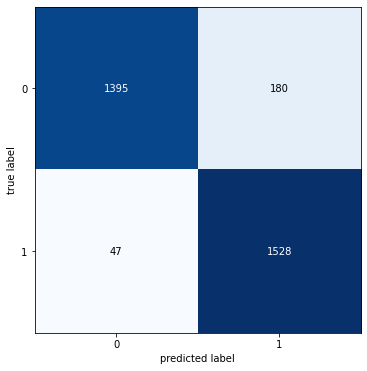

In [ ]:
# predictions based on the Naive Bayes classifier
from mlxtend.plotting import plot_confusion_matrix

predictions1=pipeline1.predict(x_val)

cm = confusion_matrix(y_val, predictions1)
print(confusion_matrix(y_val, predictions1))
print('\n')
print(classification_report(y_val, predictions1))

plot_confusion_matrix(cm, figsize=(6,6))

[[2000  250]
 [  83 2167]]


              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2250
           1       0.90      0.96      0.93      2250

    accuracy                           0.93      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.93      0.93      0.93      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9851fbe50>)

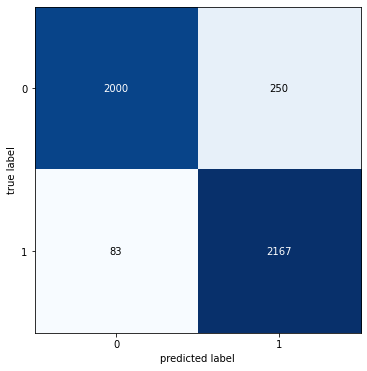

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

predictions1=pipeline1.predict(x_test)

cm = confusion_matrix(y_test, predictions1)
print(confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline2=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

pipeline2.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

[[1354  221]
 [  42 1533]]


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1575
           1       0.87      0.97      0.92      1575

    accuracy                           0.92      3150
   macro avg       0.92      0.92      0.92      3150
weighted avg       0.92      0.92      0.92      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9843051d0>)

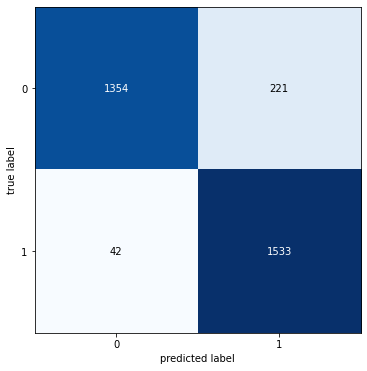

In [ ]:
# predictions based on the Naive Bayes classifier

predictions2=pipeline2.predict(x_val)

cm = confusion_matrix(y_val, predictions2) 
print(confusion_matrix(y_val, predictions2))
print('\n')
print(classification_report(y_val, predictions2))
plot_confusion_matrix(cm, figsize=(6,6))

[[1948  302]
 [  77 2173]]


              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2250
           1       0.88      0.97      0.92      2250

    accuracy                           0.92      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.92      0.92      0.92      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9842e4d10>)

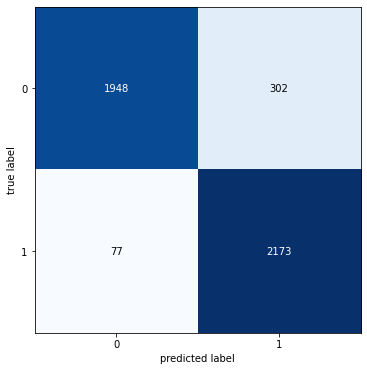

In [ ]:
# predictions based on the Naive Bayes classifier

predictions2=pipeline2.predict(x_test)

cm = confusion_matrix(y_test, predictions2) 
print(confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

model = MultinomialNB()
model_selection = GridSearchCV(model, param_grid=params)   

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

Best Score:  0.5
Best Params:  {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline3=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.01))
    ])

pipeline3.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.01))])

[[1465  110]
 [  78 1497]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1575
           1       0.93      0.95      0.94      1575

    accuracy                           0.94      3150
   macro avg       0.94      0.94      0.94      3150
weighted avg       0.94      0.94      0.94      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff983b6e650>)

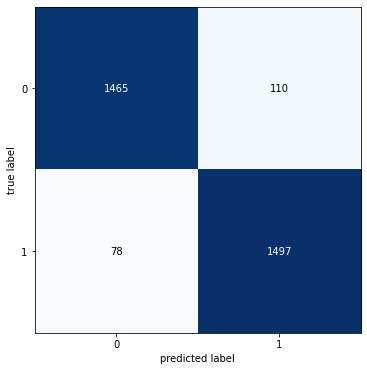

In [ ]:
# predictions based on the Naive Bayes classifier

predictions3=pipeline3.predict(x_val)


cm = confusion_matrix(y_val, predictions3) 
print(confusion_matrix(y_val, predictions3))
print('\n')
print(classification_report(y_val, predictions3))

plot_confusion_matrix(cm, figsize=(6,6))

[[2081  169]
 [ 133 2117]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2250
           1       0.93      0.94      0.93      2250

    accuracy                           0.93      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.93      0.93      0.93      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff983b52050>)

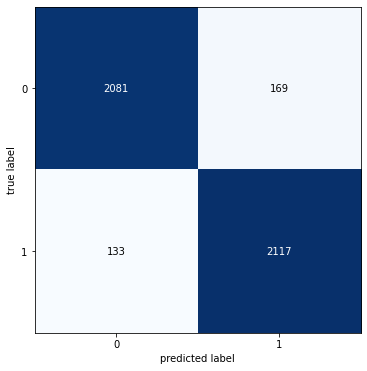

In [ ]:
# predictions based on the Naive Bayes classifier

predictions3=pipeline3.predict(x_test)


cm = confusion_matrix(y_test, predictions3) 
print(confusion_matrix(y_test, predictions3))
print('\n')
print(classification_report(y_test, predictions3))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(alpha =[0.001, 0.01, 0.1, 0.5, 1.0, 10.0,])
model = MultinomialNB()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

Best Score:  0.5
Best Params:  {'alpha': 0.001}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline4=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.001))
    ])

pipeline4.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.001))])

[[1478   97]
 [  92 1483]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1575
           1       0.94      0.94      0.94      1575

    accuracy                           0.94      3150
   macro avg       0.94      0.94      0.94      3150
weighted avg       0.94      0.94      0.94      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9834b4d90>)

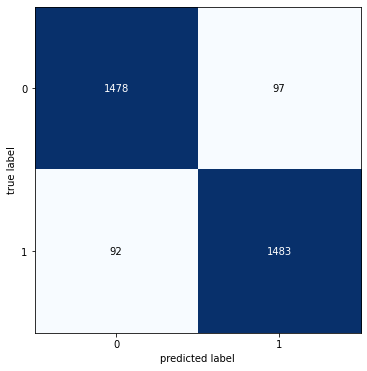

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_val)
cm = confusion_matrix(y_val, predictions4) 

print(confusion_matrix(y_val, predictions4))
print('\n')
print(classification_report(y_val, predictions4))


plot_confusion_matrix(cm, figsize=(6,6))

[[2101  149]
 [ 162 2088]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2250
           1       0.93      0.93      0.93      2250

    accuracy                           0.93      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.93      0.93      0.93      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9834c7450>)

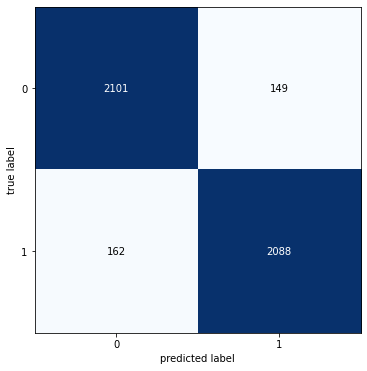

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_test)
cm = confusion_matrix(y_test, predictions4) 

print(confusion_matrix(y_test, predictions4))
print('\n')
print(classification_report(y_test, predictions4))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
import xgboost as xgb

# using TfidfVectorizer

pipeline5=Pipeline([
    ('vect',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier())
    ])

pipeline5.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', XGBClassifier())])

[[1562   13]
 [   4 1571]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff979ba2d10>)

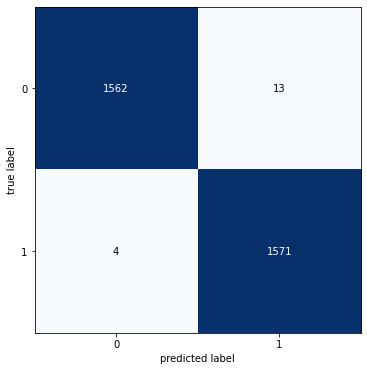

In [ ]:
# predictions based on the XGBoost classifier

predictions5=pipeline5.predict(x_val)

cm = confusion_matrix(y_val, predictions5) 
print(confusion_matrix(y_val, predictions5))
print('\n')
print(classification_report(y_val, predictions5))

plot_confusion_matrix(cm, figsize=(6,6))

[[2233   17]
 [   7 2243]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2250
           1       0.99      1.00      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff979b61750>)

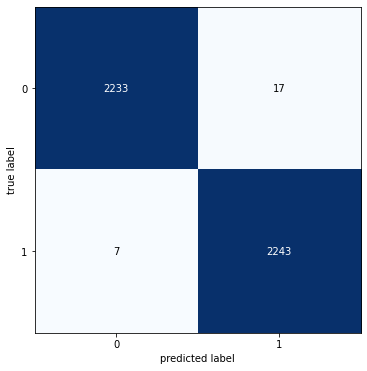

In [ ]:
# predictions based on the XGBoost classifier

predictions5=pipeline5.predict(x_test)

cm = confusion_matrix(y_test, predictions5) 
print(confusion_matrix(y_test, predictions5))
print('\n')
print(classification_report(y_test, predictions5))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline6=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier())
    ])

pipeline6.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', XGBClassifier())])

[[1561   14]
 [   4 1571]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9790da690>)

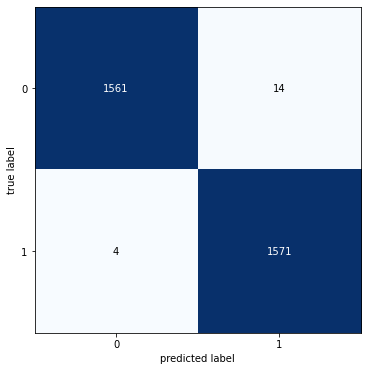

In [ ]:
# predictions based on the XGBoost classifier

predictions6=pipeline6.predict(x_val)
cm = confusion_matrix(y_val, predictions6) 
print(confusion_matrix(y_val, predictions6))
print('\n')
print(classification_report(y_val, predictions6))

plot_confusion_matrix(cm, figsize=(6,6))

[[2235   15]
 [   7 2243]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2250
           1       0.99      1.00      1.00      2250

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff978d098d0>)

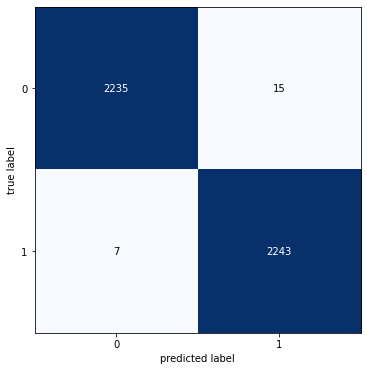

In [ ]:
# predictions based on the XGBoost classifier

predictions6=pipeline6.predict(x_test)
cm = confusion_matrix(y_test, predictions6) 
print(confusion_matrix(y_test, predictions6))
print('\n')
print(classification_report(y_test, predictions6))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier


params = {
     'max_depth':[4,5,6],
     'min_child_weight':[4,5,6],
     'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/10.0 for i in range(6,10)],
     'colsample_bytree':[i/10.0 for i in range(6,10)]

}


model = XGBClassifier(max_iter=1000)
parameter_selection = GridSearchCV(model, param_grid=params)                    # using gridserachCV for finding the best parameters for the classifier

parameter_selection.fit(x_train_re, y_train_re)
print('Best Score: ', parameter_selection.best_score_) 
print('Best Params: ', parameter_selection.best_params_) 

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Best Score:  0.9697959183673468
Best Params:  {'colsample_bytree': 0.6, 'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.9}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline7=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier(colsample_bytree=0.6, gamma=0.1, min_child_weight=4, subsample=0.9, max_depth=6))
    ])

pipeline7.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.6, gamma=0.1, max_depth=6,
                               min_child_weight=4, subsample=0.9))])

[[1561   14]
 [   4 1571]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff97818cd50>)

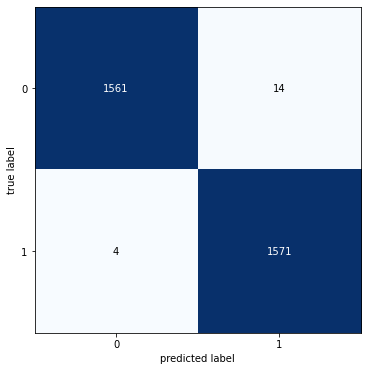

In [ ]:
# predictions based on the XGBoost classifier

predictions7=pipeline7.predict(x_val)
cm = confusion_matrix(y_val, predictions7) 
print(confusion_matrix(y_val, predictions7))
print('\n')
print(classification_report(y_val, predictions7))
plot_confusion_matrix(cm, figsize=(6,6))

[[2231   19]
 [   7 2243]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2250
           1       0.99      1.00      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff978195ed0>)

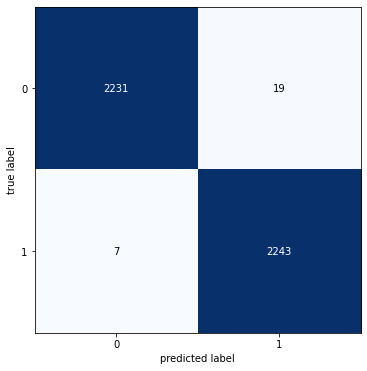

In [ ]:
 # predictions based on the XGBoost classifier

predictions7=pipeline7.predict(x_test)
cm = confusion_matrix(y_test, predictions7) 
print(confusion_matrix(y_test, predictions7))
print('\n')
print(classification_report(y_test, predictions7))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from xgboost.sklearn import XGBClassifier
distributions = dict(max_depth=[4,5,6], min_child_weight=[4,5,6],  gamma=[i/10.0 for i in range(0,5)], subsample=[i/10.0 for i in range(6,10)], colsample_bytree=[i/10.0 for i in range(6,10)])   
     
model = XGBClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Best Score:  0.9648979591836733
Best Params:  {'subsample': 0.7, 'min_child_weight': 4, 'max_depth': 6, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline8=Pipeline([
    ('bow',TfidfVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier(subsample=0.7, min_child_weight=4, max_depth=6, gama=0.3, colsample_bytree=0.8))
    ])

pipeline8.fit(x_train,y_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, gama=0.3, max_depth=6,
                               min_child_weight=4, subsample=0.7))])

[[1560   15]
 [   3 1572]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9778aa2d0>)

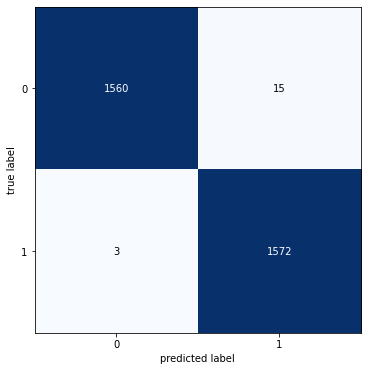

In [ ]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_val)
cm = confusion_matrix(y_val, predictions8) 
print(confusion_matrix(y_val, predictions8))
print('\n')
print(classification_report(y_val, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

[[2232   18]
 [   5 2245]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2250
           1       0.99      1.00      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff977292c10>)

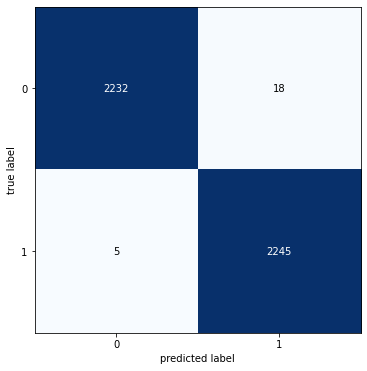

In [ ]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_test)
cm = confusion_matrix(y_test, predictions8) 
print(confusion_matrix(y_test, predictions8))
print('\n')
print(classification_report(y_test, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline9=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

pipeline9.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7ff986ebff80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

[[1514   61]
 [  19 1556]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1575
           1       0.96      0.99      0.97      1575

    accuracy                           0.97      3150
   macro avg       0.97      0.97      0.97      3150
weighted avg       0.97      0.97      0.97      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff97727bdd0>)

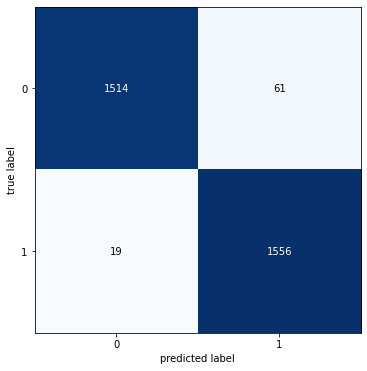

In [ ]:
# predictions based on the Random Forest classifier

predictions9=pipeline9.predict(x_val)

cm = confusion_matrix(y_val, predictions9) 
print(confusion_matrix(y_val, predictions9))
print('\n')
print(classification_report(y_val, predictions9))

plot_confusion_matrix(cm, figsize=(6,6))

[[2156   94]
 [  34 2216]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2250
           1       0.96      0.98      0.97      2250

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff977264f10>)

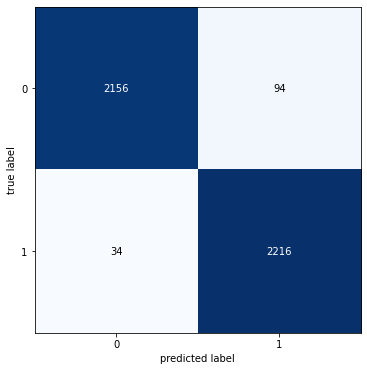

In [ ]:
# predictions based on the Random Forest classifier

predictions9=pipeline9.predict(x_test)

cm = confusion_matrix(y_test, predictions9) 
print(confusion_matrix(y_test, predictions9))
print('\n')
print(classification_report(y_test, predictions9))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline10=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

pipeline10.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

[[1507   68]
 [  24 1551]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1575
           1       0.96      0.98      0.97      1575

    accuracy                           0.97      3150
   macro avg       0.97      0.97      0.97      3150
weighted avg       0.97      0.97      0.97      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50b77efd0>)

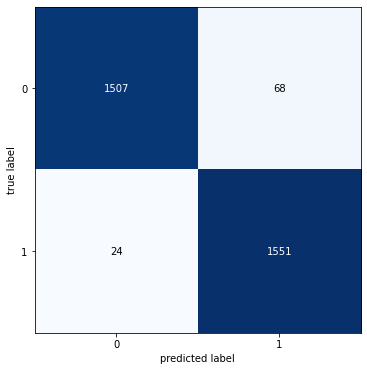

In [ ]:
# predictions based on the Random Forest classifier
from mlxtend.plotting import plot_confusion_matrix

predictions10=pipeline10.predict(x_val)
cm = confusion_matrix(y_val, predictions10) 
print(confusion_matrix(y_val, predictions10))
print('\n')
print(classification_report(y_val, predictions10))

plot_confusion_matrix(cm, figsize=(6,6))

[[2148  102]
 [  31 2219]]


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2250
           1       0.96      0.99      0.97      2250

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50b1a1b90>)

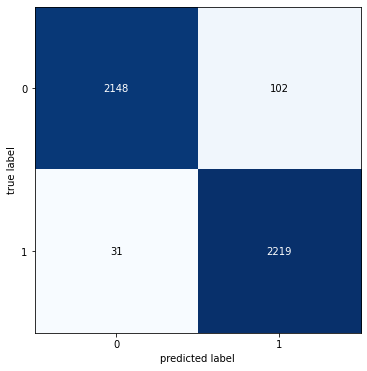

In [ ]:
# predictions based on the Random Forest classifier

predictions10=pipeline10.predict(x_test)
cm = confusion_matrix(y_test, predictions10) 
print(confusion_matrix(y_test, predictions10))
print('\n')
print(classification_report(y_test, predictions10))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
     'n_estimators': [200, 400, 600],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [2,3,4, None],
    'criterion' :['gini', 'entropy', 'log_loss']
}


model = RandomForestClassifier()
parameter_selection_rfc = GridSearchCV(model, param_grid=params)                # using GridSearchCV for finding the best parameters for the classifier
parameter_selection_rfc.fit(x_train_re, y_train_re)

print('Best Score: ', parameter_selection_rfc.best_score_) 
print('Best Params: ', parameter_selection_rfc.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.9722448979591837
Best Params:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 200}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline11=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='gini', max_depth=None, max_features=None, n_estimators=200))
    ])

pipeline11.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(max_features=None, n_estimators=200))])

[[1560   15]
 [   2 1573]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.99      1.00      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb505514c50>)

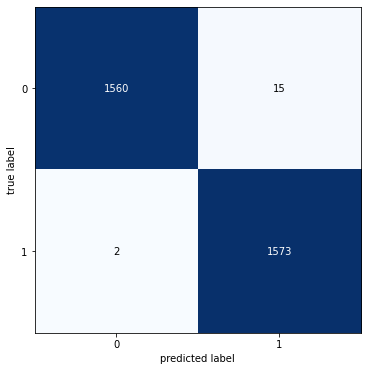

In [ ]:
# predictions based on the Random Forest classifier

predictions11=pipeline11.predict(x_val)
cm = confusion_matrix(y_val, predictions11) 
print(confusion_matrix(y_val, predictions11))
print('\n')
print(classification_report(y_val, predictions11))
plot_confusion_matrix(cm, figsize=(6,6))

[[2222   28]
 [   4 2246]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2250
           1       0.99      1.00      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb505571690>)

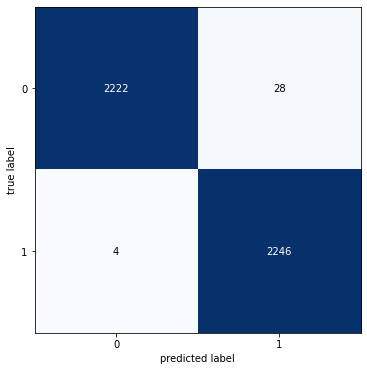

In [ ]:
# predictions based on the Random Forest classifier

predictions11=pipeline11.predict(x_test)
cm = confusion_matrix(y_test, predictions11) 
print(confusion_matrix(y_test, predictions11))
print('\n')
print(classification_report(y_test, predictions11))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using RandomizedSearchCV for finding the best parameters for the classifier
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(n_estimators =[200, 400, 600], max_features=['auto', 'sqrt', 'log2', None], max_depth= [2,3,4, None], criterion=['gini', 'entropy', 'log_loss'])
model = RandomForestClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.9722448979591837
Best Params:  {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline12=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', n_estimators=600))
    ])

pipeline12.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        n_estimators=600))])

[[1517   58]
 [  12 1563]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1575
           1       0.96      0.99      0.98      1575

    accuracy                           0.98      3150
   macro avg       0.98      0.98      0.98      3150
weighted avg       0.98      0.98      0.98      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50225df10>)

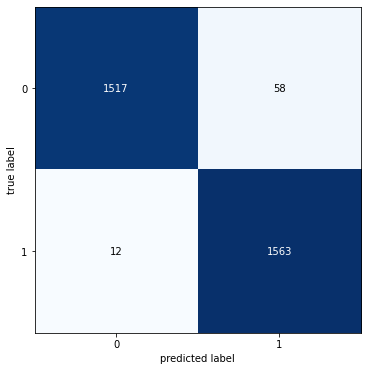

In [ ]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_val)
cm = confusion_matrix(y_val, predictions12) 
print(confusion_matrix(y_val, predictions12))
print('\n')
print(classification_report(y_val, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

[[2175   75]
 [  17 2233]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2250
           1       0.97      0.99      0.98      2250

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5022cb590>)

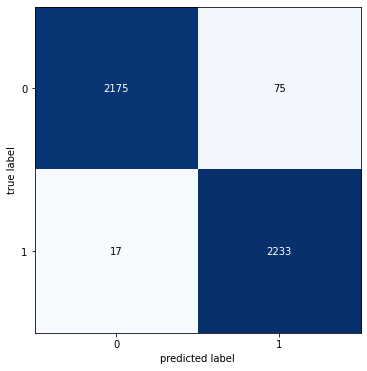

In [ ]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_test)
cm = confusion_matrix(y_test, predictions12) 
print(confusion_matrix(y_test, predictions12))
print('\n')
print(classification_report(y_test, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline13=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

pipeline13.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

[[1542   33]
 [  12 1563]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1575
           1       0.98      0.99      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50a9e7650>)

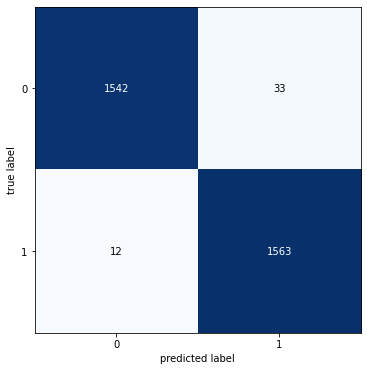

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions13=pipeline13.predict(x_val)
cm = confusion_matrix(y_val, predictions13) 
print(confusion_matrix(y_val, predictions13))
print('\n')
print(classification_report(y_val, predictions13))
plot_confusion_matrix(cm, figsize=(6,6))

[[2201   49]
 [  15 2235]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2250
           1       0.98      0.99      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50a9ccc50>)

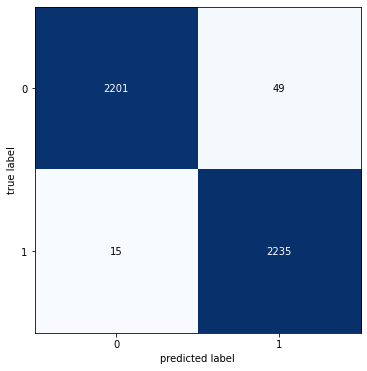

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions13=pipeline13.predict(x_test)
cm = confusion_matrix(y_test, predictions13) 
print(confusion_matrix(y_test, predictions13))
print('\n')
print(classification_report(y_test, predictions13))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline14=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])


pipeline14.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

[[1531   44]
 [  29 1546]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1575
           1       0.97      0.98      0.98      1575

    accuracy                           0.98      3150
   macro avg       0.98      0.98      0.98      3150
weighted avg       0.98      0.98      0.98      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5077d2ad0>)

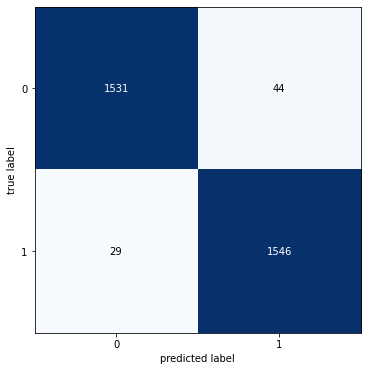

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions14=pipeline14.predict(x_val)
cm = confusion_matrix(y_val, predictions14) 
print(confusion_matrix(y_val, predictions14))
print('\n')
print(classification_report(y_val, predictions14))
plot_confusion_matrix(cm, figsize=(6,6))

[[2177   73]
 [  39 2211]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2250
           1       0.97      0.98      0.98      2250

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5077af950>)

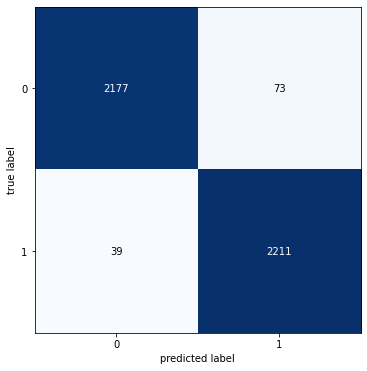

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions14=pipeline14.predict(x_test)
cm = confusion_matrix(y_test, predictions14) 
print(confusion_matrix(y_test, predictions14))
print('\n')
print(classification_report(y_test, predictions14))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
params = {
    'C' : [0.003, 0.01, 0.03, 0.1], 
    'loss': ['hinge', 'squared_hinge'], 
    'n_iter_no_change': [5, 10, 30, 100, 300]
}

model = PassiveAggressiveClassifier()
parameter_selection_pac = GridSearchCV(model, param_grid=params)                # using GridSearchCV for finding the best parameters for the classifier
parameter_selection_pac.fit(x_train_re, y_train_re)

print('Best Score: ', parameter_selection_pac.best_score_) 
print('Best Params: ', parameter_selection_pac.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5303401360544218
Best Params:  {'C': 0.03, 'loss': 'hinge', 'n_iter_no_change': 100}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline15=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.03, loss='hinge', n_iter_no_change=100))
    ])

pipeline15.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.03, n_iter_no_change=100))])

[[1529   46]
 [  27 1548]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1575
           1       0.97      0.98      0.98      1575

    accuracy                           0.98      3150
   macro avg       0.98      0.98      0.98      3150
weighted avg       0.98      0.98      0.98      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb504ba1f50>)

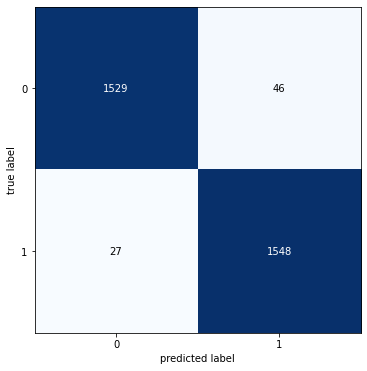

In [ ]:
predictions15=pipeline15.predict(x_val)
cm = confusion_matrix(y_val, predictions15) 
print(confusion_matrix(y_val, predictions15))
print('\n')
print(classification_report(y_val, predictions15))
plot_confusion_matrix(cm, figsize=(6,6))

[[2181   69]
 [  38 2212]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2250
           1       0.97      0.98      0.98      2250

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb504ba8990>)

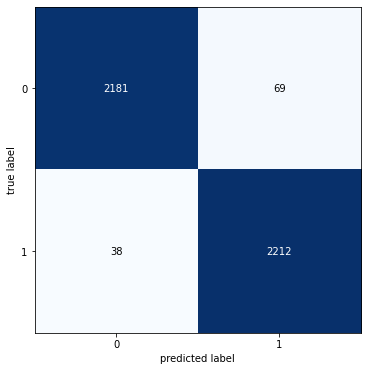

In [ ]:
predictions15=pipeline15.predict(x_test)
cm = confusion_matrix(y_test, predictions15) 
print(confusion_matrix(y_test, predictions15))
print('\n')
print(classification_report(y_test, predictions15))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(C =[0.003, 0.01, 0.03, 0.1],  loss= ['hinge', 'squared_hinge'], n_iter_no_change= [5, 10, 30, 100, 300] )
model = PassiveAggressiveClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5119727891156463
Best Params:  {'n_iter_no_change': 30, 'loss': 'hinge', 'C': 0.03}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline16=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.03, loss='hinge', n_iter_no_change=30))
    ])

pipeline16.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.03, n_iter_no_change=30))])

[[1532   43]
 [  25 1550]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1575
           1       0.97      0.98      0.98      1575

    accuracy                           0.98      3150
   macro avg       0.98      0.98      0.98      3150
weighted avg       0.98      0.98      0.98      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb504414750>)

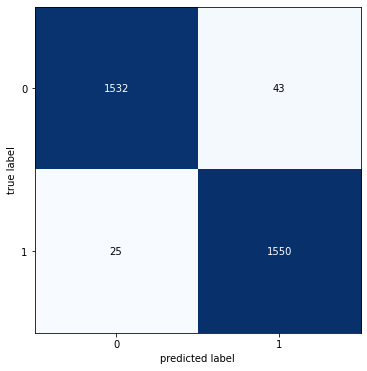

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_val)
cm = confusion_matrix(y_val, predictions16)
print(confusion_matrix(y_val, predictions16))
print('\n')
print(classification_report(y_val, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

[[2180   70]
 [  38 2212]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2250
           1       0.97      0.98      0.98      2250

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50443cc90>)

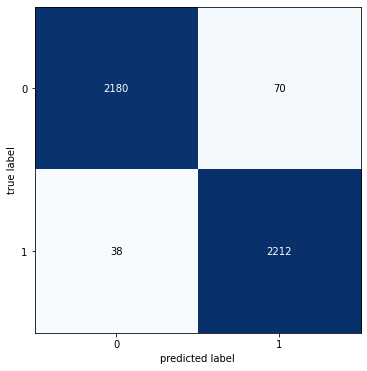

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_test)
cm = confusion_matrix(y_test, predictions16)
print(confusion_matrix(y_test, predictions16))
print('\n')
print(classification_report(y_test, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline17 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])

pipeline17.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

[[1510   65]
 [  33 1542]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1575
           1       0.96      0.98      0.97      1575

    accuracy                           0.97      3150
   macro avg       0.97      0.97      0.97      3150
weighted avg       0.97      0.97      0.97      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb507055b50>)

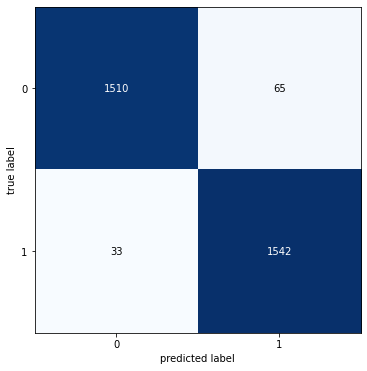

In [ ]:
# predictions based on the Logistic Regression  classifier

predictions17=pipeline17.predict(x_val)

cm = confusion_matrix(y_val, predictions17)
print(confusion_matrix(y_val, predictions17))
print('\n')
print(classification_report(y_val, predictions17))
plot_confusion_matrix(cm, figsize=(6,6))

[[2161   89]
 [  37 2213]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2250
           1       0.96      0.98      0.97      2250

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb50705cbd0>)

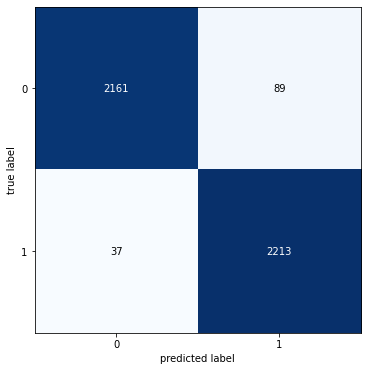

In [ ]:
# predictions based on the Logistic Regression  classifier

predictions17=pipeline17.predict(x_test)

cm = confusion_matrix(y_test, predictions17)
print(confusion_matrix(y_test, predictions17))
print('\n')
print(classification_report(y_test, predictions17))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline18=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])

pipeline18.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

[[1501   74]
 [  66 1509]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1575
           1       0.95      0.96      0.96      1575

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb506bff310>)

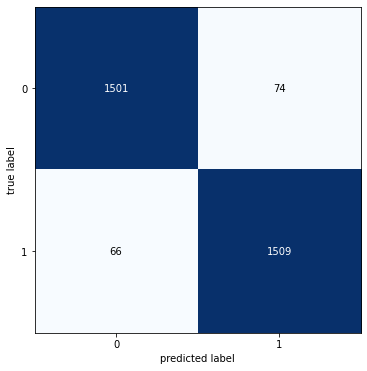

In [ ]:
# predictions based on the Logistic Regression  classifier
predictions18=pipeline18.predict(x_val)
cm = confusion_matrix(y_val, predictions18)
print(confusion_matrix(y_val, predictions18))
print('\n')
print(classification_report(y_val, predictions18))
plot_confusion_matrix(cm, figsize=(6,6))

[[2145  105]
 [  86 2164]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2250
           1       0.95      0.96      0.96      2250

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb506bf0110>)

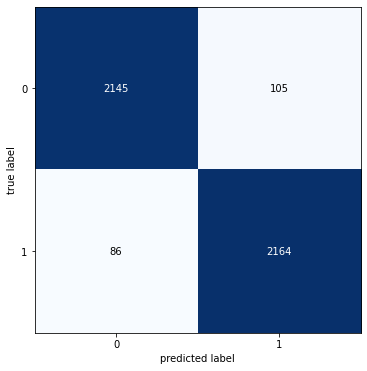

In [ ]:
# predictions based on the Logistic Regression  classifier
predictions18=pipeline18.predict(x_test)
cm = confusion_matrix(y_test, predictions18)
print(confusion_matrix(y_test, predictions18))
print('\n')
print(classification_report(y_test, predictions18))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty': ['l1', 'l2', 'elasticnet', 'none'] }
model = LogisticRegression()
model_selection = GridSearchCV(model, param_grid=params)                        # using gridserachCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5352380952380953
Best Params:  {'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline19=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(penalty='l1', solver='liblinear'))
    ])

pipeline19.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

[[1556   19]
 [  19 1556]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1575
           1       0.99      0.99      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb503d6a890>)

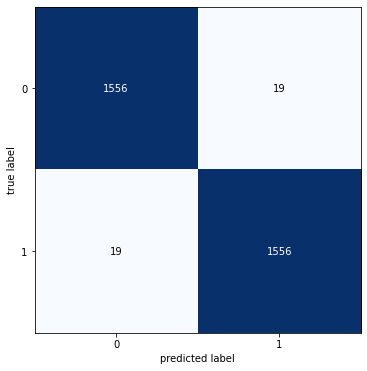

In [ ]:
# predictions based on the Logistic Regression  classifier
predictions19=pipeline19.predict(x_val)
cm = confusion_matrix(y_val, predictions19)
print(confusion_matrix(y_val, predictions19))
print('\n')
print(classification_report(y_val, predictions19))
plot_confusion_matrix(cm, figsize=(6,6))

[[2219   31]
 [  28 2222]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2250
           1       0.99      0.99      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb503d862d0>)

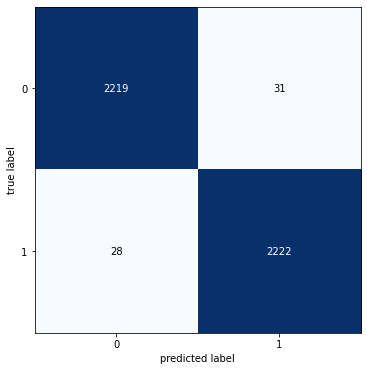

In [ ]:
# predictions based on the Logistic Regression  classifier
predictions19=pipeline19.predict(x_test)
cm = confusion_matrix(y_test, predictions19)
print(confusion_matrix(y_test, predictions19))
print('\n')
print(classification_report(y_test, predictions19))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty= ['l1', 'l2', 'elasticnet', 'none'])
model = LogisticRegression()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5337414965986393
Best Params:  {'solver': 'liblinear', 'penalty': 'l1'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline20=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(solver='liblinear', penalty='l1'))
    ])

pipeline20.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

[[1556   19]
 [  19 1556]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1575
           1       0.99      0.99      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb503685cd0>)

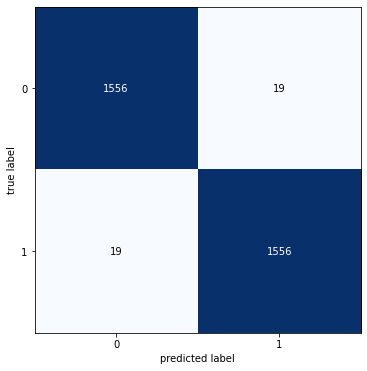

In [ ]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_val)
cm = confusion_matrix(y_val, predictions20)
print(confusion_matrix(y_val, predictions20))
print('\n')
print(classification_report(y_val, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

[[2219   31]
 [  28 2222]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2250
           1       0.99      0.99      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb503661e90>)

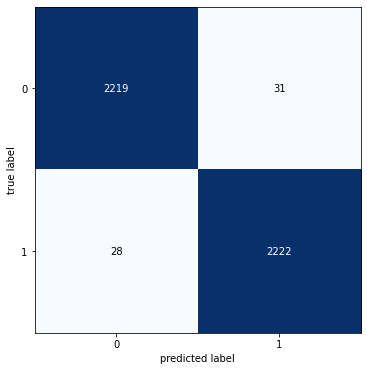

In [ ]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_test)
cm = confusion_matrix(y_test, predictions20)
print(confusion_matrix(y_test, predictions20))
print('\n')
print(classification_report(y_test, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline21 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier())
    ])

pipeline21.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

[[1543   32]
 [  14 1561]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1575
           1       0.98      0.99      0.99      1575

    accuracy                           0.99      3150
   macro avg       0.99      0.99      0.99      3150
weighted avg       0.99      0.99      0.99      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5064dc290>)

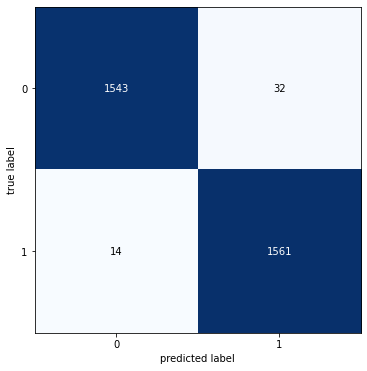

In [ ]:
# predictions based on the Naive Bayes classifier

predictions21=pipeline21.predict(x_val)
cm = confusion_matrix(y_val, predictions21)
print(confusion_matrix(y_val, predictions21))
print('\n')
print(classification_report(y_val, predictions21))
plot_confusion_matrix(cm, figsize=(6,6))

[[2200   50]
 [  17 2233]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2250
           1       0.98      0.99      0.99      2250

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5064f3510>)

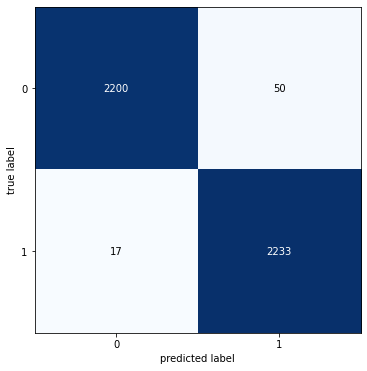

In [ ]:
# predictions based on the Naive Bayes classifier

predictions21=pipeline21.predict(x_test)
cm = confusion_matrix(y_test, predictions21)
print(confusion_matrix(y_test, predictions21))
print('\n')
print(classification_report(y_test, predictions21))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline22=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier())
    ])

pipeline22.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

[[1526   49]
 [  36 1539]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1575
           1       0.97      0.98      0.97      1575

    accuracy                           0.97      3150
   macro avg       0.97      0.97      0.97      3150
weighted avg       0.97      0.97      0.97      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb505bfbed0>)

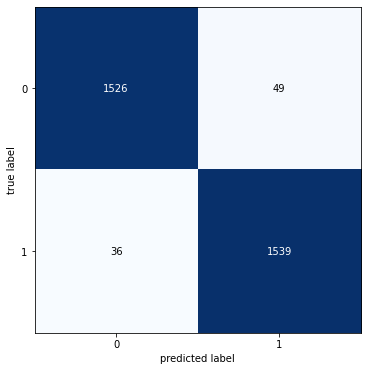

In [ ]:
# predictions based on the SGD classifier

predictions22=pipeline22.predict(x_val)

cm = confusion_matrix(y_val, predictions22)
print(confusion_matrix(y_val, predictions22))
print('\n')
print(classification_report(y_val, predictions22))
plot_confusion_matrix(cm, figsize=(6,6))

[[2170   80]
 [  53 2197]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2250
           1       0.96      0.98      0.97      2250

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb505bee310>)

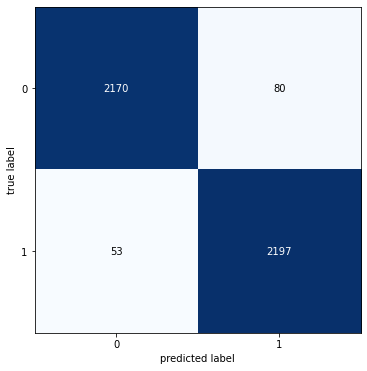

In [ ]:
# predictions based on the Naive Bayes classifier

predictions22=pipeline22.predict(x_test)

cm = confusion_matrix(y_test, predictions22)
print(confusion_matrix(y_test, predictions22))
print('\n')
print(classification_report(y_test, predictions22))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'loss' : ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          'penalty': ['l1', 'l2', 'elasticnet', 'none']}

model = SGDClassifier()
model_selection = GridSearchCV(model, param_grid=params)                        # using gridserachCV for finding the best parameters for the classifier


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5122448979591837
Best Params:  {'loss': 'modified_huber', 'penalty': 'none'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/l

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline23=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(loss= 'modified_huber', penalty='none'))
    ])

pipeline23.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 SGDClassifier(loss='modified_huber', penalty='none'))])

[[1496   79]
 [  52 1523]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1575
           1       0.95      0.97      0.96      1575

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb502fad6d0>)

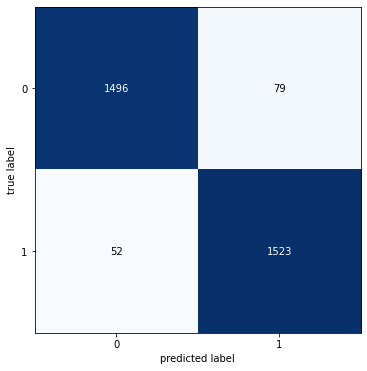

In [ ]:
# predictions based on the Naive Bayes classifier
predictions23=pipeline23.predict(x_val)

cm = confusion_matrix(y_val, predictions23)
print(confusion_matrix(y_val, predictions23))
print('\n')
print(classification_report(y_val, predictions23))

plot_confusion_matrix(cm, figsize=(6,6))

[[2137  113]
 [  98 2152]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2250
           1       0.95      0.96      0.95      2250

    accuracy                           0.95      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.95      0.95      0.95      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb502f977d0>)

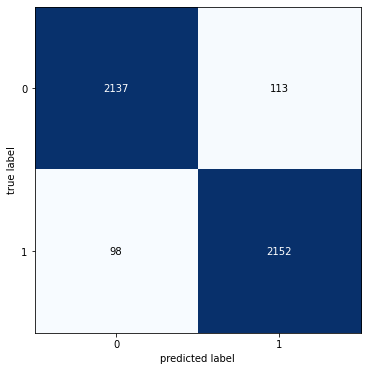

In [ ]:
# predictions based on the SGD classifier
predictions23=pipeline23.predict(x_test)

cm = confusion_matrix(y_test, predictions23)
print(confusion_matrix(y_test, predictions23))
print('\n')
print(classification_report(y_test, predictions23))

plot_confusion_matrix(cm, figsize=(6,6))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(loss= ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          penalty = ['l1', 'l2', 'elasticnet', 'none'])
model = SGDClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5108843537414967
Best Params:  {'penalty': 'elasticnet', 'loss': 'hinge'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/li

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline24=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(penalty= 'elasticnet', loss='hinge'))
    ])

pipeline24.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fb50c9d1a70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(penalty='elasticnet'))])

[[1528   47]
 [  37 1538]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1575
           1       0.97      0.98      0.97      1575

    accuracy                           0.97      3150
   macro avg       0.97      0.97      0.97      3150
weighted avg       0.97      0.97      0.97      3150



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5029af1d0>)

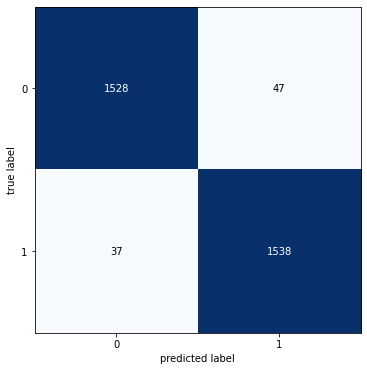

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_val)

cm = confusion_matrix(y_val, predictions24)
print(confusion_matrix(y_val, predictions24))
print('\n')
print(classification_report(y_val, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))

[[2172   78]
 [  44 2206]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2250
           1       0.97      0.98      0.97      2250

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb502926650>)

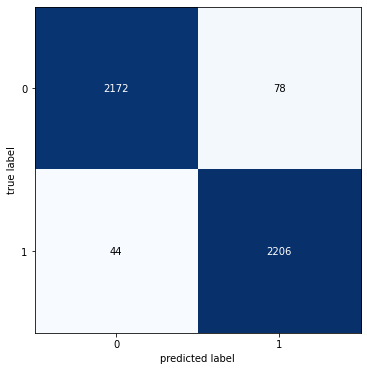

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_test)

cm = confusion_matrix(y_test, predictions24)
print(confusion_matrix(y_test, predictions24))
print('\n')
print(classification_report(y_test, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))